# Assignment 1 ( summary) 

1. The variance of portforlio composed of risky securities is given as the weighted sum of the elements of the covariance matrix with the product of the investment proportions as weights. 
2. The more the assets are negatively correlated, the smaller the total variance gets, and you can hedge from the risks. 
3. If the correlation of the assets are 1, diversification cannot happen. 
4. You can obtain the effective portfolio composed of risky assets by the markowitz portfolio theory, then by finding the tangent CAL, you can get the best portfolio with the biggest sharpe ratio. This result will be always be constant among different investors. 
5. Based on the risk-averse of different investors, we can find the weight allocation between the risky assets and risk free ones, using the indifference curve tangent to the CAL which you obtained . 
6. risk pooling increases the expected return, and also the risk . However in the end it increases the risk return tradeoff. Risk sharing does not increase the expected return, but decreases the risk, hence increasing the risk return ratio. 
7. Time diversification itself does not decrease the risks unless, you increase the time horizon while fixing the whole budget, which is basically corresponds to the risk sharing theme. 
8. single factor model classifies the standard deviation(risk) caused by the market, and the firm itself. 
9. single factor model reduces the amount of calculation needed for the selection of assets , which needs huge calculation for the correlations between risky assets .
9. we can obtain the index model with regression of the return rates. 
10. The bigger the alpha value is, the bigger the weight of the corresponding asset gets inside the portfolio. 
11. the total portfolio will be composed of active and passive portfolios. 
12. The passive portfolio is used to increase diversification . 

# Assignment 2 

# Assignment 3


1. 

In [8]:
import pandas as pd
prices = pd.DataFrame({"BLUE":[8.70,8.91,8.71,8.43,8.73],"ORANGE":[10.66, 11.08,10.71,11.59,12.11]})
prices


,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [9]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


2.


In [10]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [14]:
prices.iloc[1:].values/prices.iloc[:-1]-1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [15]:
prices/prices.shift(1)-1


,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [19]:
returns = prices.pct_change()

In [23]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


BLUE      0.033565
ORANGE    0.048328
dtype: float64

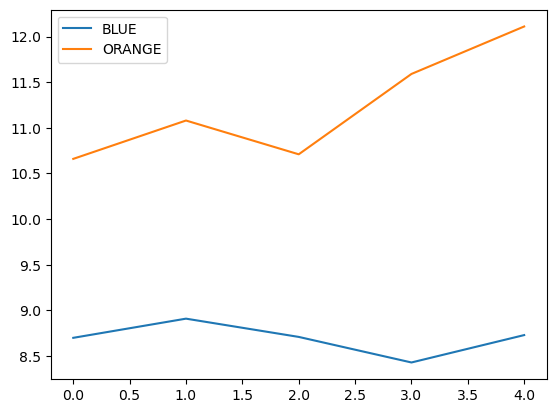

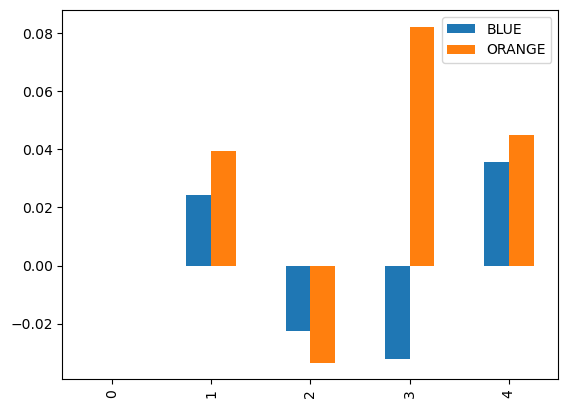

In [18]:
import pandas as pd
prices = pd.DataFrame({"BLUE":[8.70,8.91,8.71,8.43,8.73],"ORANGE":[10.66, 11.08,10.71,11.59,12.11]})
prices.plot()
returns = prices.pct_change()
returns.plot.bar()
returns.std()

In [20]:
import numpy as np
(((returns+1).prod()-1)*100).round(2)

BLUE       0.34
ORANGE    13.60
dtype: float64

In [22]:
rm= 0.01
(1+rm)**12-1

0.12682503013196977

In [23]:
returns.std()*np.sqrt(12)

BLUE      0.116272
ORANGE    0.167415
dtype: float64

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


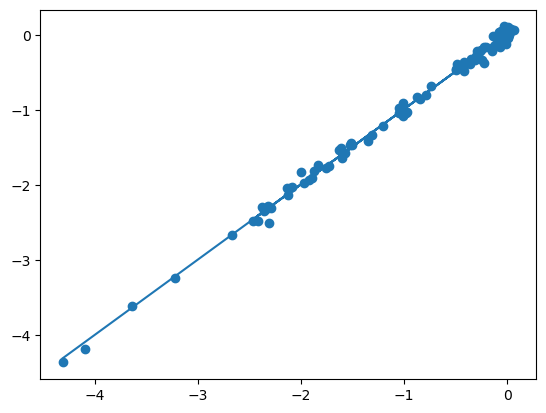

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.240e+04
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          7.88e-145
Time:                        19:24:55   Log-Likelihood:                 165.73
No. Observations:                 119   AIC:                            -327.5
Df Residuals:                     117   BIC:                            -321.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0172      0.007      2.443      0.0

In [75]:
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt
apple =  yf.download("AAPL", start="2013-01-01", end="2023-01-01",  interval = "1mo")['Adj Close'].pct_change()
apple.columns = ['Date','return']
sp = yf.download("^GSPC", start="2013-01-01", end="2023-01-01",  interval = "1mo")['Adj Close'].pct_change()
sp.columns = ['Date','return']
import pandas as pd
tre = pd.read_csv("/Users/donghoonhyun/downloads/TB3MS.csv")
tre.columns = ['date','return']
tre = tre[:-1]
apple = (apple)-np.array(tre['return'])
sp = (sp)-np.array(tre['return'])
apple = apple.dropna()
sp = sp.dropna()
import matplotlib.pyplot as plt
mask = ~np.isnan(sp) & ~np.isnan(apple)
b, a, r_value, p_value, std_err = stats.linregress(sp[mask], apple[mask])
def myfunc(x):
  return b * x + a
mymodel = list(map(myfunc, sp))
plt.scatter(sp,apple)
plt.plot(sp, mymodel)
plt.show()
import statsmodels.api as sm
from scipy.stats import norm
x = sm.add_constant(sp)
y = apple
test = sm.OLS(y, x).fit()
print(test.summary())

 # problem3

In [88]:
import numpy as np
import pandas as pd
stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA']
daily_returns = pd.DataFrame(yf.download(stocks, start="2018-01-01", end="2023-01-01",  interval = "1d")['Adj Close']).pct_change().dropna()
days = daily_returns.shape[0]
annual_ret = ((daily_returns).mean())*252
print(annual_ret)



[*********************100%***********************]  5 of 5 completed
AAPL     0.287461
AMZN     0.133328
GOOGL    0.148950
MSFT     0.265836
NVDA     0.353042
dtype: float64
